In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import json
import torchvision.models as models
import model_helper
from PIL import Image
import math
import cv2

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
#data
data_dir = "flower_data"
train_dir =  data_dir + "/train"
valid_dir =  data_dir + "/valid"
#categories names
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
len(cat_to_name)

102

In [4]:
train_loader = model_helper.create_dataloaders(train_dir) 
valid_loader = model_helper.create_dataloaders(valid_dir)

In [ ]:
#Visualise some of the data
dataiterator = iter(train_loader)
imgs, labels = dataiterator.next()
imgs = imgs.numpy()
labels = labels.numpy()
print(imgs.shape)
print(labels.shape)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(20,20))
for indx in range(20):
    ax = fig.add_subplot(5,5,indx+1)
    plt.imshow(np.transpose((imgs[indx])))
    ax.set_title(cat_to_name[str(labels[indx]+1)])

In [5]:
model, criterion, optimizer = model_helper.create_model()
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3)
    (3): Linear(in_features=4096, out_features=2048, bias=True)
    (4): ReL

In [ ]:
model_helper.train_model(model,device,train_loader,valid_loader,criterion,optimizer,100)

Epoch: 1 	Elabsed Time : 128.29057502746582 Seconds
Training Loss: 0.555243 	Validation Loss: 0.636785	Validation Accuracy: 84%
Epoch: 2 	Elabsed Time : 62.362961769104004 Seconds
Training Loss: 0.530512 	Validation Loss: 0.721656	Validation Accuracy: 84%


In [6]:
model.load_state_dict(torch.load('model.pt'))

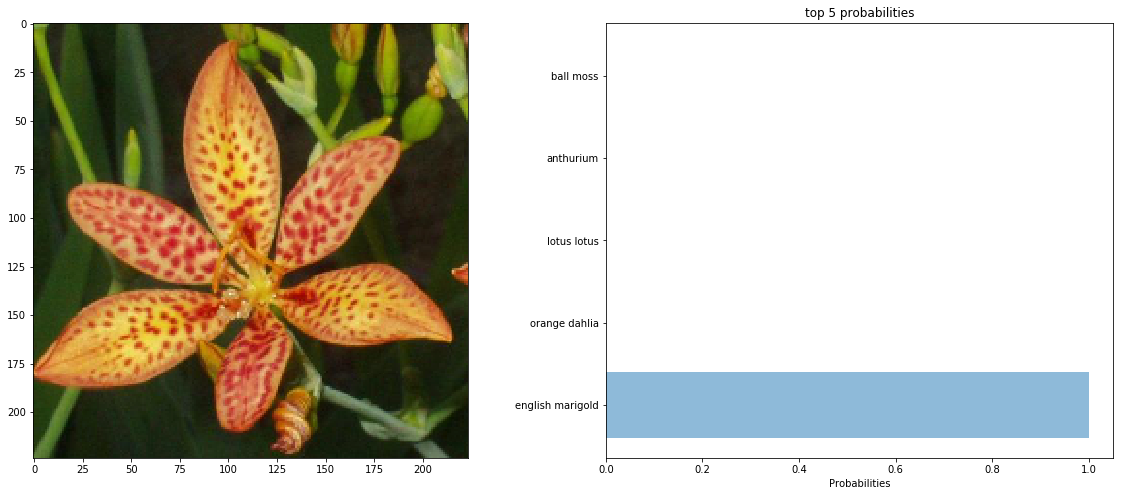

In [11]:
model_helper.predict('image_08040.jpg',model.to(device),device,cat_to_name)

In [12]:
cat_to_name['102']

'blackberry lily'